# Final Project
## Neural network: Prediction on bike sharing demand

In [1]:
# Import

import folium
from folium.plugins import MarkerCluster

# data set
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# LSTM
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn import metrics
%matplotlib inline

### Importing the merged dataset

In [2]:
#dataset = pd.read_csv('Joint_dataframe.csv')

dataset = pd.read_csv(
    'April_to_June_3_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

# exclude timestamp column
#dataset = dataset.loc[:, dataset.columns!='timestamp']

In [3]:
dataset = dataset.drop(["index",'is_holiday','is_weekend'], axis = 1)
dataset = dataset.dropna(axis=0, how='any')
dataset

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,17,39,2,-22.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.197574,51.4996
2016-04-01,42,24,3,18.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.084606,51.5213
2016-04-01,51,30,4,21.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.120974,51.5301
2016-04-01,44,71,5,-27.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.156876,51.4931
2016-04-01,48,38,6,10.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.144229,51.5181
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-30,1,109,167,-108.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.147624,51.4940
2016-06-30,3,17,168,-14.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.195456,51.5004
2016-06-30,1,30,169,-29.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.165164,51.5147


In [4]:
location = pd.read_csv("Cycle hire docking stations.csv")

In [5]:
#dataset.to_csv (r'C:Desktop\dataframe.csv', index = False, header=True)

## Plotting

In [6]:
def plot_graph(y_train, y_test_org, y_pred, i):
    ## Print heading
    plt.title( 'Station Id: %d' % (i))

    plt.plot(np.arange(0, len(y_train)), y_train, color='green', label="History")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_org, color='blue', marker='.', label="Actual")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, color='red', marker='.', label="Prediction")
    plt.ylabel('Bike Count')
    plt.xlabel('Time Step')
    plt.legend()
    plt.show();

## Error calculation

In [7]:
def get_MAE(y_test_org, y_pred):
    MAE = metrics.mean_absolute_error(y_test_org, y_pred)
    return MAE

In [8]:
def get_MSE(y_test_org, y_pred):
    MSE = metrics.mean_squared_error(y_test_org, y_pred)
    return MSE

In [9]:
def get_RMSE(y_test_org, y_pred):
    RMSE = np.sqrt(metrics.mean_squared_error(y_test_org, y_pred))
    return RMSE

In [10]:
def get_RMAE(y_test_org, y_pred):
    RMAE = np.sqrt(metrics.mean_absolute_error(y_test_org, y_pred))
    return RMAE

In [11]:
def print_error_calculation(y_test_org, y_pred):

    print('MAE:', get_MAE(y_test_org, y_pred))
    print('MSE:', get_MSE(y_test_org, y_pred))
    print('RMSE:', get_RMSE(y_test_org, y_pred))
    print('RMAE:', get_RMAE(y_test_org, y_pred))

### Datasets for each stations

In [12]:
# Extract number of bikes leaving to the station
## for loop with 800 station
## put that info to 800 datasets

obj = dataset.groupby('Station Id')

In [13]:
obj.get_group(1)

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-02,13,22,1,-9.0,10.729167,9.458333,62.125000,14.833333,2.0,-0.109971,51.5292
2016-04-03,27,22,1,5.0,11.562500,11.041667,77.541667,11.312500,3.0,-0.109971,51.5292
2016-04-04,52,20,1,32.0,11.083333,10.500000,77.520833,13.583333,4.0,-0.109971,51.5292
2016-04-05,75,12,1,63.0,11.583333,10.916667,65.708333,14.916667,5.0,-0.109971,51.5292
2016-04-06,41,23,1,18.0,9.500000,7.208333,65.812500,26.437500,6.0,-0.109971,51.5292
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-25,11,9,1,2.0,16.062500,16.062500,73.458333,13.562500,25.0,-0.109971,51.5292
2016-06-26,48,26,1,22.0,16.604167,16.604167,71.145833,19.270833,26.0,-0.109971,51.5292
2016-06-27,23,22,1,1.0,18.062500,18.062500,68.958333,16.041667,27.0,-0.109971,51.5292


In [14]:
# add datasets to list

df = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]

#[35,79,80,179,198,205,237,259,283,285,342,369,385,413,414,415,416,417,418,422,429,434,438,439,493,497,
           #502,525,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df.append(obj.get_group(i))

## Neural network

2022-04-13 00:07:04.676920: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
4/4 [==============================] - 1s 4ms/step - loss: 0.9730 - accuracy: 0.0000e+00
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9728 - accuracy: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9728 - accuracy: 0.0000e+00
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9727 - accuracy: 0.0000e+00
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9727 - accuracy: 0.0000e+00
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9726 - accuracy: 0.0000e+00
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9726 - accuracy: 0.0000e+00
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9726 - accuracy: 0.0000e+00
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9725 - accuracy: 0.0000e+00
Epoch 10/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9725 - accuracy: 0.0000e+00

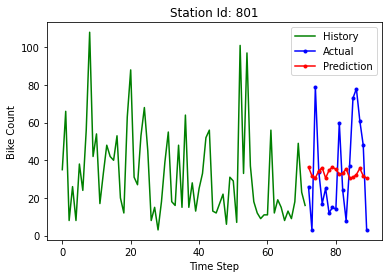

MAE: 22.471639103359646
MSE: 678.5520426616024
RMSE: 26.049031511010202
RMAE: 4.74042604660801


In [15]:
#X = df[i]['date'].values.reshape(-1,1) # reshape to make it two-dimentional
#y = df[i]['In'].values # Predict
    
X = df[1].values[:, 6:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
y = df[1].values[:, 0:1] # 'In'
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler

PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X = PredictorScalerFit.transform(X)
y = TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### create ANN model ###

neural_network_model = keras.Sequential([
# Defining the Input layer and FIRST hidden layer, both are same!
layers.Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'),
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
layers.Dense(units=5, kernel_initializer='normal', activation='tanh'),
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
layers.Dense(1, kernel_initializer='normal'),
])


# Fitting the ANN to the Training set
neural_network_model.compile(optimizer ='adam', loss ='mean_squared_error', metrics = ['accuracy'])
neural_network_model.fit(X_train, y_train, epochs = 50, batch_size = 20)

# Generating Predictions on testing data
pred = neural_network_model.predict(X_test)
y_pred = TargetVarScalerFit.inverse_transform(pred)
y_test_org = TargetVarScalerFit.inverse_transform(y_test)
y_train = TargetVarScalerFit.inverse_transform(y_train)
Test_Data = PredictorScalerFit.inverse_transform(X_test)
 
plot_graph(y_train, y_test_org, y_pred, i)
print_error_calculation(y_test_org,y_pred)

# for all stations

Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9728 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.9727 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.9725 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9724 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.9724 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.9723 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.9723 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9722 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.9719 - accuracy: 0.0000e+00
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9717 - accuracy: 0.0000e+00

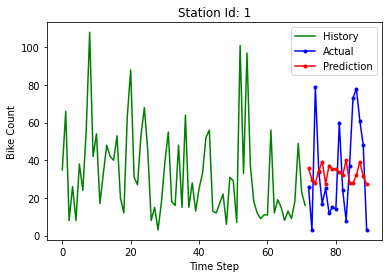

MAE: 22.716283162434895
MSE: 709.8045757756186
RMSE: 26.64215786635194
RMAE: 4.766160211578593
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1728 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1728 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1724 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1722 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1720 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1719 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1717 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1717 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1714 - accuracy: 0.0000e+00
Epoch

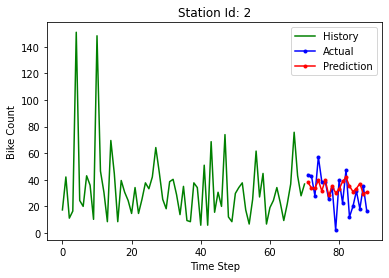

MAE: 10.089930601719786
MSE: 160.53564280181402
RMSE: 12.67026609041081
RMAE: 3.1764651110502986
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7641 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7635 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7630 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7626 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7620 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7615 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7610 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7601 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7595 - accuracy: 0.0000e+00
Epo

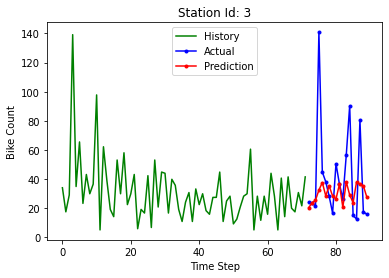

MAE: 20.549307564931446
MSE: 1108.6670282786506
RMSE: 33.29665190794189
RMAE: 4.53313440843435
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1011 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1009 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1007 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1006 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1006 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1005 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1004 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1004 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1003 - accuracy: 0.0000e+00
Epoch

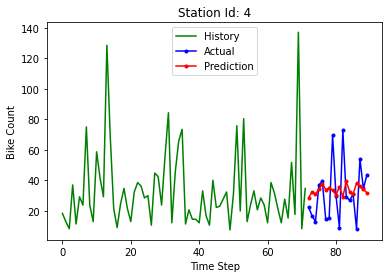

MAE: 14.748891563783957
MSE: 375.0001700884743
RMSE: 19.36492112270211
RMAE: 3.8404285651192573
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0985 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0979 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0975 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0974 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0972 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0970 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0969 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0965 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0962 - accuracy: 0.0000e+00
Epoc

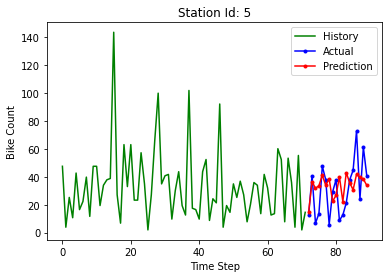

MAE: 14.815637207074104
MSE: 323.93924984240954
RMSE: 17.998312416513098
RMAE: 3.8491086250032103
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1966 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1961 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1959 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1956 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1955 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1950 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1945 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1941 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1935 - accuracy: 0.0000e+00
Ep

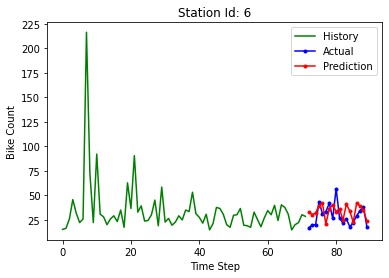

MAE: 9.992535924503365
MSE: 132.83831647918376
RMSE: 11.525550593320206
RMAE: 3.161097265903624
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0099 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0097 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0100 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0097 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0097 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0097 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0097 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0097 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0096 - accuracy: 0.0000e+00
Epoc

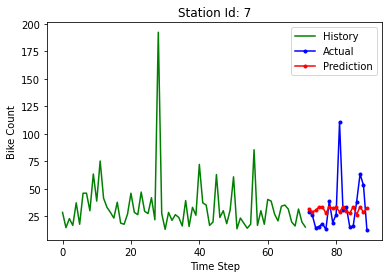

MAE: 16.536452658157835
MSE: 580.4813824759465
RMSE: 24.093181244409102
RMAE: 4.066503738859444
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3837 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3809 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3780 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3772 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3758 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3751 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3738 - accuracy: 0.0000e+00
Epoc

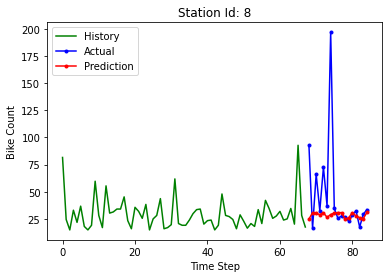

MAE: 22.46888588093188
MSE: 2134.6817932502267
RMSE: 46.20261673596234
RMAE: 4.740135639507785
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1045 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1041 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1039 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1038 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1037 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1034 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1034 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1032 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1031 - accuracy: 0.0000e+00
Epoch

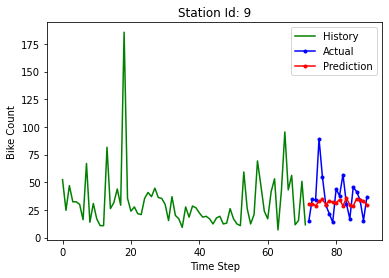

MAE: 13.412360092366946
MSE: 343.60677776064284
RMSE: 18.536633398776672
RMAE: 3.662288914376765

Error Calculation
Average MAE: 14.53302846559042
Average MSE: 586.9554936752967
Average RMSE: 21.033029137638813
Average RMAE: 3.579532247983333


In [16]:
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

np.random.seed(7)

#no_station = len(location['Station.Id'])
no_station = 10
for i in range(1, no_station):
    
    X = df[i].values[:, 6:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df[i].values[:, 0:1] # 'In'
 
    ### Sandardization of data ###
    from sklearn.preprocessing import StandardScaler

    PredictorScaler = StandardScaler()
    TargetVarScaler = StandardScaler()

    # Generating the standardized values of X and y
    X = PredictorScaler.fit(X).transform(X)
    y = TargetVarScaler.fit(y).transform(y)
 
    # Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    ### create ANN model ###

    neural_network_model = keras.Sequential([
    layers.Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'),
    layers.Dense(units=5, kernel_initializer='normal', activation='tanh'),
    layers.Dense(1, kernel_initializer='normal'),
    ])

    # Fitting the ANN to the Training set
    neural_network_model.compile(optimizer ='adam', loss ='mean_squared_error', metrics = ['accuracy'])
    neural_network_model.fit(X_train, y_train, batch_size = 15,  epochs = 50)

    pred = neural_network_model.predict(X_test)
    y_pred = TargetVarScalerFit.inverse_transform(pred)
    y_test_org = TargetVarScalerFit.inverse_transform(y_test)
    y_train = TargetVarScalerFit.inverse_transform(y_train)
    Test_Data = PredictorScalerFit.inverse_transform(X_test)
 
    plot_graph(y_train, y_test_org, y_pred, i)
    print_error_calculation(y_test_org,y_pred)

    totalMAE += get_MAE(y_test_org,y_pred)
    totalMSE += get_MSE(y_test_org,y_pred)
    totalRMAE += get_RMSE(y_test_org,y_pred)
    totalRMSE += get_RMAE(y_test_org,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)
    

## RobustScaler

Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5328 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5310 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5291 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5272 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5253 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5236 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5218 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5178 - accuracy: 0.0000e+00
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.0000e+00

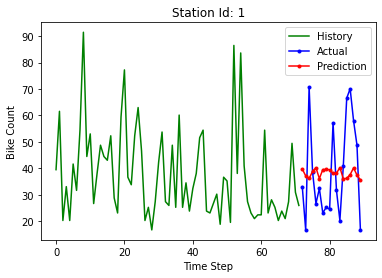

MAE: 15.890921251699515
MSE: 342.45759795826757
RMSE: 18.505609905060346
RMAE: 3.9863418382897766
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 1.3974 - accuracy: 0.0423
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 1.3964 - accuracy: 0.0423
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 1.3959 - accuracy: 0.0423
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 1.3954 - accuracy: 0.0423
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 1.3948 - accuracy: 0.0423
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 1.3943 - accuracy: 0.0423
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 1.3937 - accuracy: 0.0423
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 1.3930 - accuracy: 0.0423
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 1.3925 - accuracy: 0.0423
Epoch 10/50
5/5 [=====================

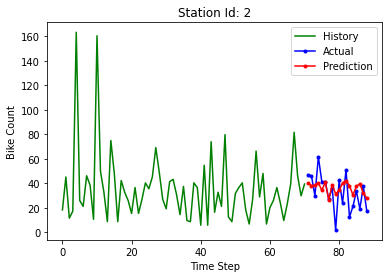

MAE: 10.660853775065858
MSE: 181.09139172758088
RMSE: 13.457020165236466
RMAE: 3.2650962887893304
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7797 - accuracy: 0.0694
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7789 - accuracy: 0.0694
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7785 - accuracy: 0.0694
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7777 - accuracy: 0.0694
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7776 - accuracy: 0.0694
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7768 - accuracy: 0.0694
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7765 - accuracy: 0.0694
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7757 - accuracy: 0.0694
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7754 - accuracy: 0.0694
Epoch 10/50
5/5 [=====================

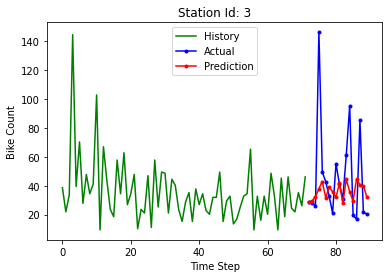

MAE: 20.621873980654556
MSE: 1107.1836516060687
RMSE: 33.27436928938051
RMAE: 4.541131354701663
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 1.2206 - accuracy: 0.0278
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 1.2182 - accuracy: 0.0278
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 1.2168 - accuracy: 0.0278
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 1.2145 - accuracy: 0.0278
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 1.2121 - accuracy: 0.0278
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 1.2103 - accuracy: 0.0278
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 1.2077 - accuracy: 0.0278
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 1.2060 - accuracy: 0.0278
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 1.2045 - accuracy: 0.0278
Epoch 10/50
5/5 [=======================

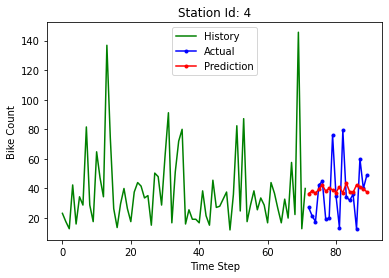

MAE: 15.280036668541815
MSE: 384.39532933587594
RMSE: 19.60600238028844
RMAE: 3.908968747450127
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7914 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7900 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7895 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7883 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7874 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7866 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7858 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7848 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7835 - accuracy: 0.0000e+00
Epoc

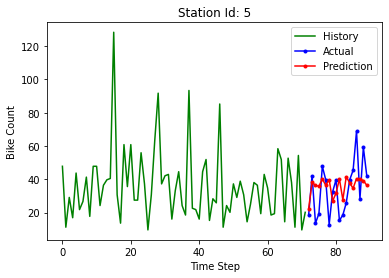

MAE: 12.610529695942835
MSE: 231.45616240999925
RMSE: 15.213683393905608
RMAE: 3.5511307630025164
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 4.1960 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 4.1928 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 4.1894 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 4.1863 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 4.1830 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 4.1800 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 4.1765 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 4.1729 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 4.1701 - accuracy: 0.0000e+00
Ep

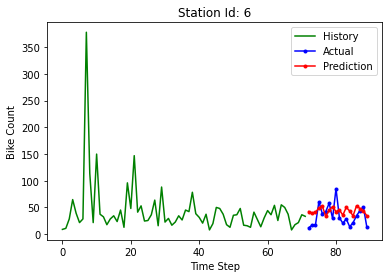

MAE: 18.623472046630596
MSE: 432.3677026745917
RMSE: 20.79345336096416
RMAE: 4.315492097852873
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 1.6483 - accuracy: 0.0278
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 1.6451 - accuracy: 0.0278
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 1.6430 - accuracy: 0.0278
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 1.6410 - accuracy: 0.0278
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 1.6375 - accuracy: 0.0278
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 1.6344 - accuracy: 0.0278
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 1.6318 - accuracy: 0.0278
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 1.6288 - accuracy: 0.0278
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 1.6263 - accuracy: 0.0278
Epoch 10/50
5/5 [========================

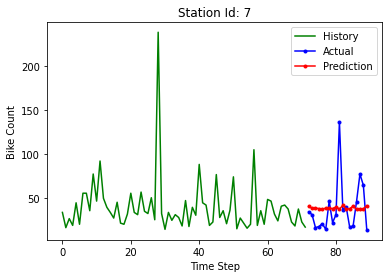

MAE: 21.138476096218756
MSE: 891.6456723365087
RMSE: 29.860436573106373
RMAE: 4.5976598499909445
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1025 - accuracy: 0.0147
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1017 - accuracy: 0.0147
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1008 - accuracy: 0.0147
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1001 - accuracy: 0.0147
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0997 - accuracy: 0.0147
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0997 - accuracy: 0.0147
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0989 - accuracy: 0.0147
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0986 - accuracy: 0.0147
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0979 - accuracy: 0.0147
Epoch 10/50
5/5 [======================

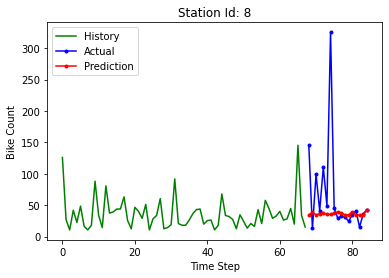

MAE: 38.255578029676684
MSE: 6332.1654214936825
RMSE: 79.57490447052815
RMAE: 6.1851093789582
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0887 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0876 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0862 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0845 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0835 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0825 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0815 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0805 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0795 - accuracy: 0.0000e+00
Epoch 

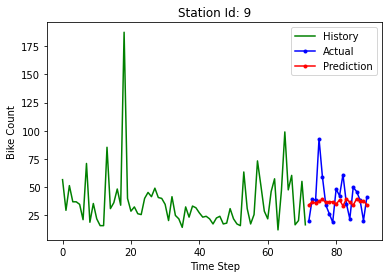

MAE: 13.203588032846547
MSE: 333.19371141046554
RMSE: 18.25359447918315
RMAE: 3.6336741781352035

Error Calculation
Average MAE: 16.628532957727714
Average MSE: 1023.5956640953042
Average RMSE: 24.853907401765326
Average RMAE: 3.798460449717063


In [17]:
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

np.random.seed(7)

#no_station = len(location['Station.Id'])
no_station = 10
for i in range(1, no_station):
    
    X = df[i].values[:, 6:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df[i].values[:, 0:1] # 'In'
 
    ### Sandardization of data ###
    from sklearn.preprocessing import RobustScaler

    PredictorScaler = RobustScaler()
    TargetVarScaler = RobustScaler()

    # Generating the standardized values of X and y
    X = PredictorScaler.fit(X).transform(X)
    y = TargetVarScaler.fit(y).transform(y)
 
    # Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    ### create ANN model ###

    neural_network_model = keras.Sequential([
    layers.Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'),
    layers.Dense(units=5, kernel_initializer='normal', activation='tanh'),
    layers.Dense(1, kernel_initializer='normal'),
    ])

    # Fitting the ANN to the Training set
    neural_network_model.compile(optimizer ='adam', loss ='mean_squared_error', metrics = ['accuracy'])
    neural_network_model.fit(X_train, y_train, batch_size = 15,  epochs = 50)

    pred = neural_network_model.predict(X_test)
    y_pred = TargetVarScalerFit.inverse_transform(pred)
    y_test_org = TargetVarScalerFit.inverse_transform(y_test)
    y_train = TargetVarScalerFit.inverse_transform(y_train)
    Test_Data = PredictorScalerFit.inverse_transform(X_test)
 
    plot_graph(y_train, y_test_org, y_pred, i)
    print_error_calculation(y_test_org,y_pred)

    totalMAE += get_MAE(y_test_org,y_pred)
    totalMSE += get_MSE(y_test_org,y_pred)
    totalRMAE += get_RMSE(y_test_org,y_pred)
    totalRMSE += get_RMAE(y_test_org,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)
    

## MinMaxScaler

Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1278 - accuracy: 0.0139
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1245 - accuracy: 0.0139
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1213 - accuracy: 0.0139
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1179 - accuracy: 0.0139
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.0139
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1110 - accuracy: 0.0139
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1071 - accuracy: 0.0139
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1029 - accuracy: 0.0139
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0988 - accuracy: 0.0139
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0942 - accuracy: 0.0139
Epoch 11/50
5/5 [======================

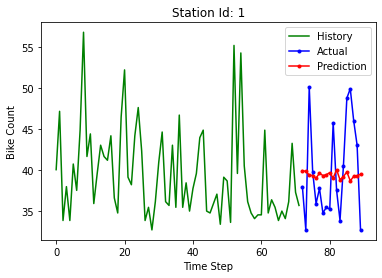

MAE: 5.055831963306876
MSE: 34.80579409672978
RMSE: 5.8996435567523715
RMAE: 2.2485177258155815
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0731 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0703 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0674 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0648 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0619 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0589 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0559 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0501 - accuracy: 0.0000e+00
Epoc

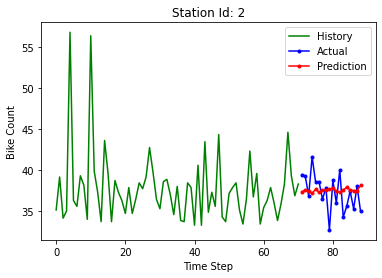

MAE: 1.8939545994207982
MSE: 5.385359839380765
RMSE: 2.3206378087458552
RMAE: 1.3762102308226016
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0583 - accuracy: 0.0417
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.0417
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.0417
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.0417
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0485 - accuracy: 0.0417
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0460 - accuracy: 0.0417
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0437 - accuracy: 0.0417
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.0417
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0387 - accuracy: 0.0417
Epoch 10/50
5/5 [======================

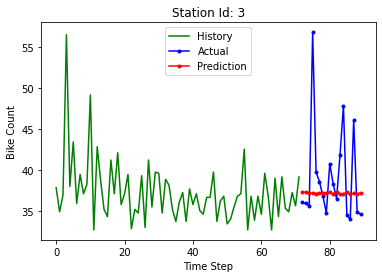

MAE: 3.931373863001522
MSE: 36.64809875680835
RMSE: 6.053767319348205
RMAE: 1.9827692409863338
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0753 - accuracy: 0.0139
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.0139
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.0139
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0685 - accuracy: 0.0139
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0661 - accuracy: 0.0139
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0637 - accuracy: 0.0139
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0614 - accuracy: 0.0139
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0587 - accuracy: 0.0139
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0562 - accuracy: 0.0139
Epoch 10/50
5/5 [========================

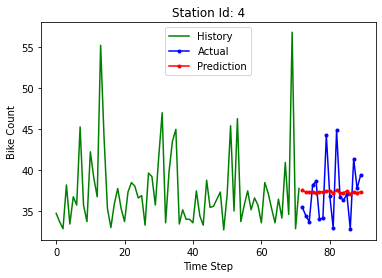

MAE: 2.7051455293488704
MSE: 11.46495476711068
RMSE: 3.385993911263084
RMAE: 1.6447326619693763
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0797 - accuracy: 0.0278
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0770 - accuracy: 0.0278
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0744 - accuracy: 0.0278
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0716 - accuracy: 0.0278
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0688 - accuracy: 0.0278
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0658 - accuracy: 0.0278
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0630 - accuracy: 0.0278
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0600 - accuracy: 0.0278
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0567 - accuracy: 0.0278
Epoch 10/50
5/5 [=======================

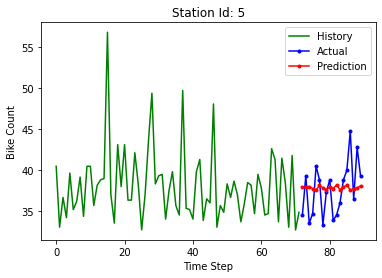

MAE: 2.6559848862146653
MSE: 10.294711542605055
RMSE: 3.2085372902001708
RMAE: 1.6297192660745792
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.0278
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.0278
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 0.0278
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0223 - accuracy: 0.0278
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0213 - accuracy: 0.0278
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0204 - accuracy: 0.0278
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.0278
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.0278
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0183 - accuracy: 0.0278
Epoch 10/50
5/5 [=====================

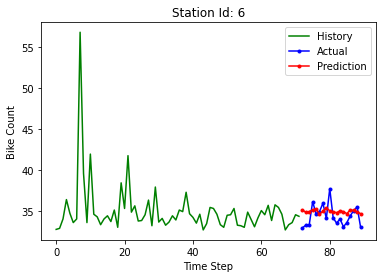

MAE: 1.1646575027939698
MSE: 1.7728329657789135
RMSE: 1.3314777376204656
RMAE: 1.0791929868165238
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0279 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0268 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0247 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0225 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 0.0000e+00
Ep

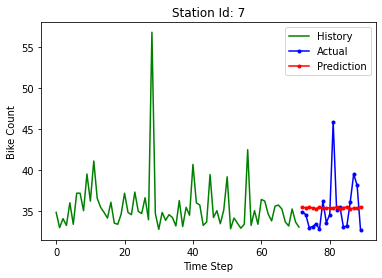

MAE: 2.2347097382987298
MSE: 10.051003257281991
RMSE: 3.1703317266939104
RMAE: 1.494894557585494
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0122 - accuracy: 0.0588
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0113 - accuracy: 0.0588
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0104 - accuracy: 0.0588
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0096 - accuracy: 0.0588
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0089 - accuracy: 0.0588
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0082 - accuracy: 0.0588
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 0.0588
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 0.0588
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 0.0588
Epoch 10/50
5/5 [======================

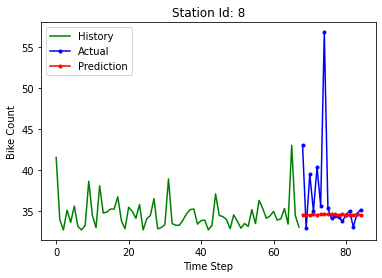

MAE: 2.9132686221723922
MSE: 36.827394702296026
RMSE: 6.068557876653729
RMAE: 1.7068299921703955
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0388 - accuracy: 0.0139
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.0139
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.0139
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 0.0139
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.0139
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.0139
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.0139
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0279 - accuracy: 0.0139
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 0.0139
Epoch 10/50
5/5 [======================

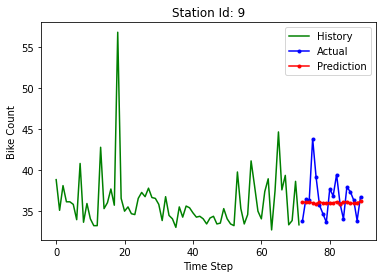

MAE: 1.786021926630244
MSE: 6.272903886787244
RMSE: 2.504576588325309
RMAE: 1.336421313295416

Error Calculation
Average MAE: 2.4340948631188066
Average MSE: 15.352305381477882
Average RMSE: 3.394352381560309
Average RMAE: 1.4499287975536304


In [18]:
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

np.random.seed(7)

#no_station = len(location['Station.Id'])
no_station = 10
for i in range(1, no_station):
    
    X = df[i].values[:, 6:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df[i].values[:, 0:1] # 'In'
 
    ### Sandardization of data ###
    from sklearn.preprocessing import MinMaxScaler

    PredictorScaler = MinMaxScaler()
    TargetVarScaler = MinMaxScaler()

    # Generating the standardized values of X and y
    X = PredictorScaler.fit(X).transform(X)
    y = TargetVarScaler.fit(y).transform(y)
 
    # Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    ### create ANN model ###

    neural_network_model = keras.Sequential([
    layers.Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'),
    layers.Dense(units=5, kernel_initializer='normal', activation='tanh'),
    layers.Dense(1, kernel_initializer='normal'),
    ])

    # Fitting the ANN to the Training set
    neural_network_model.compile(optimizer ='adam', loss ='mean_squared_error', metrics = ['accuracy'])
    neural_network_model.fit(X_train, y_train, batch_size = 15,  epochs = 50)

    pred = neural_network_model.predict(X_test)
    y_pred = TargetVarScalerFit.inverse_transform(pred)
    y_test_org = TargetVarScalerFit.inverse_transform(y_test)
    y_train = TargetVarScalerFit.inverse_transform(y_train)
    Test_Data = PredictorScalerFit.inverse_transform(X_test)
    
    plot_graph(y_train, y_test_org, y_pred, i)
    print_error_calculation(y_test_org,y_pred)

    totalMAE += get_MAE(y_test_org,y_pred)
    totalMSE += get_MSE(y_test_org,y_pred)
    totalRMAE += get_RMSE(y_test_org,y_pred)
    totalRMSE += get_RMAE(y_test_org,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)
    

## advanced

In [19]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list = [5, 10, 15, 20]
    epoch_list = [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData = pd.DataFrame(columns=['TrialNumber', 'batch_size', 'epochs', 'Accuracy'])
    
    # initializing the trials
    TrialNumber = 0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber += 1
            # create ANN model
            test_model = keras.Sequential([
            layers.Dense(units = 5, input_dim = X_train.shape[1], kernel_initializer = 'normal', activation = 'relu'),
            layers.Dense(units =5 , kernel_initializer = 'normal', activation = 'relu'),
            layers.Dense(1, kernel_initializer = 'normal'),
            ])

            # Compiling the model
            test_model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            test_model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
            MAPE = np.mean(100 * (np.abs(y_test - test_model.predict(X_test)) / y_test))
            
            # printing the results of the current iteration
            #print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData = SearchResultsData.append(pd.DataFrame(data = [[TrialNumber, batch_size_trial, epochs_trial, 100-MAPE]],
                                                                      columns = ['TrialNumber', 'batch_size', 'epochs', 'Accuracy'] ))
    return SearchResultsData

In [20]:
result_df = FunctionFindBestParams(X_train, y_train, X_test, y_test)
result_df

,TrialNumber,batch_size,epochs,Accuracy
0,1,5,5,39.365708
0,2,5,10,-412.304290
0,3,5,50,-29504.499147
0,4,5,100,-32016.639322
0,5,10,5,42.887006
0,6,10,10,38.661101
0,7,10,50,-6752.094730
0,8,10,100,-9450.844370
0,9,15,5,26.205432
0,10,15,10,42.680070


<AxesSubplot:xlabel='batch_size'>

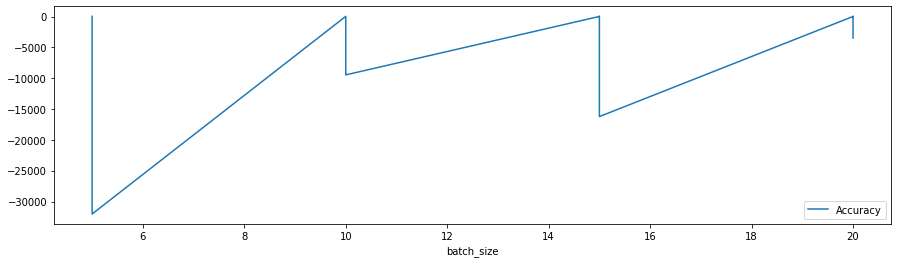

In [21]:
%matplotlib inline
result_df.plot(x='batch_size', y='Accuracy', figsize=(15,4), kind='line')

# parameters 
# e.g. 15-50
# 15 - batch size, 50 - epochs

In [22]:
return_df = result_df.loc[result_df['Accuracy'] == result_df['Accuracy'].max()]
print(return_df['batch_size'][0], return_df['epochs'][0])

20 10


Epoch 1/10
8/8 [==============================] - 0s 2ms/step - loss: 0.9729 - accuracy: 0.0000e+00
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.9728 - accuracy: 0.0000e+00
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 0.9729 - accuracy: 0.0000e+00
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 0.9726 - accuracy: 0.0000e+00
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 0.9725 - accuracy: 0.0000e+00
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 0.9725 - accuracy: 0.0000e+00
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 0.9723 - accuracy: 0.0000e+00
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 0.9722 - accuracy: 0.0000e+00
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 0.9722 - accuracy: 0.0000e+00
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 0.9718 - accuracy: 0.0000e+00

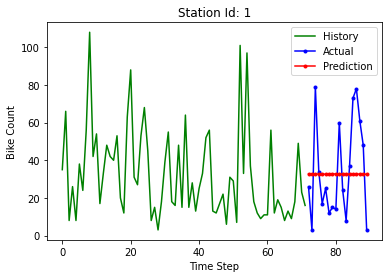

MAE: 21.59153175354004
MSE: 640.4875419613389
RMSE: 25.30785534100705
RMAE: 4.646668887874413
Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 1.1722 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 1.1721 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 1.1721 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 1.1717 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 1.1716 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 1.1714 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 1.1713 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 1.1710 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 1.1708 - accuracy: 0.0000e+

5/5 [==============================] - 0s 2ms/step - loss: 0.9721 - accuracy: 0.0000e+00
Epoch 81/100
5/5 [==============================] - 0s 2ms/step - loss: 0.9709 - accuracy: 0.0000e+00
Epoch 82/100
5/5 [==============================] - 0s 2ms/step - loss: 0.9693 - accuracy: 0.0000e+00
Epoch 83/100
5/5 [==============================] - 0s 2ms/step - loss: 0.9691 - accuracy: 0.0000e+00
Epoch 84/100
5/5 [==============================] - 0s 2ms/step - loss: 0.9672 - accuracy: 0.0000e+00
Epoch 85/100
5/5 [==============================] - 0s 2ms/step - loss: 0.9659 - accuracy: 0.0000e+00
Epoch 86/100
5/5 [==============================] - 0s 2ms/step - loss: 0.9651 - accuracy: 0.0000e+00
Epoch 87/100
5/5 [==============================] - 0s 2ms/step - loss: 0.9650 - accuracy: 0.0000e+00
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 0.9624 - accuracy: 0.0000e+00
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 0.9624 - accuracy: 0.00

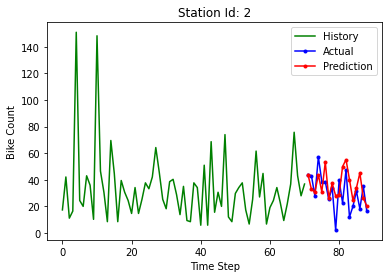

MAE: 11.016628297809037
MSE: 209.37102352782108
RMSE: 14.469658721884946
RMAE: 3.319130653922656
Epoch 1/5
4/4 [==============================] - 0s 2ms/step - loss: 0.7638 - accuracy: 0.0000e+00
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 0.7630 - accuracy: 0.0000e+00
Epoch 3/5
4/4 [==============================] - 0s 2ms/step - loss: 0.7628 - accuracy: 0.0000e+00
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 0.7623 - accuracy: 0.0000e+00
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 0.7620 - accuracy: 0.0000e+00


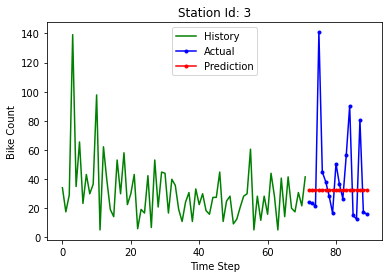

MAE: 22.319730431211187
MSE: 1125.034238467513
RMSE: 33.54153005555222
RMAE: 4.724376194928934
Epoch 1/100
8/8 [==============================] - 0s 1ms/step - loss: 1.1013 - accuracy: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 1.1007 - accuracy: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 0s 1ms/step - loss: 1.1005 - accuracy: 0.0000e+00
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 1.1006 - accuracy: 0.0000e+00
Epoch 5/100
8/8 [==============================] - 0s 1ms/step - loss: 1.1003 - accuracy: 0.0000e+00
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0997 - accuracy: 0.0000e+00
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0998 - accuracy: 0.0000e+00
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0995 - accuracy: 0.0000e+00
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0993 - accuracy: 0.0000e

8/8 [==============================] - 0s 2ms/step - loss: 1.0251 - accuracy: 0.0000e+00
Epoch 81/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0247 - accuracy: 0.0000e+00
Epoch 82/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0238 - accuracy: 0.0000e+00
Epoch 83/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0241 - accuracy: 0.0000e+00
Epoch 84/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0248 - accuracy: 0.0000e+00
Epoch 85/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0236 - accuracy: 0.0000e+00
Epoch 86/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0235 - accuracy: 0.0000e+00
Epoch 87/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0230 - accuracy: 0.0000e+00
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0232 - accuracy: 0.0000e+00
Epoch 89/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0234 - accuracy: 0.00

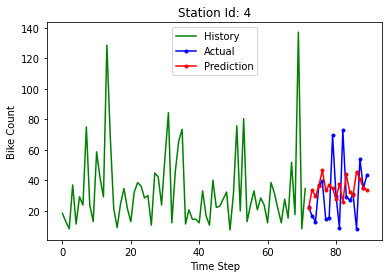

MAE: 15.35959334441452
MSE: 421.6252545722398
RMSE: 20.533515397326386
RMAE: 3.9191317079698305
Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0982 - accuracy: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0980 - accuracy: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0975 - accuracy: 0.0000e+00
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0974 - accuracy: 0.0000e+00
Epoch 5/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0973 - accuracy: 0.0000e+00
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0972 - accuracy: 0.0000e+00
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0968 - accuracy: 0.0000e+00
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0966 - accuracy: 0.0000e+00
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0961 - accuracy: 0.0000

8/8 [==============================] - 0s 1ms/step - loss: 0.8811 - accuracy: 0.0000e+00
Epoch 81/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8803 - accuracy: 0.0000e+00
Epoch 82/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8785 - accuracy: 0.0000e+00
Epoch 83/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8774 - accuracy: 0.0000e+00
Epoch 84/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8759 - accuracy: 0.0000e+00
Epoch 85/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8750 - accuracy: 0.0000e+00
Epoch 86/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8735 - accuracy: 0.0000e+00
Epoch 87/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8733 - accuracy: 0.0000e+00
Epoch 88/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8717 - accuracy: 0.0000e+00
Epoch 89/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8719 - accuracy: 0.00

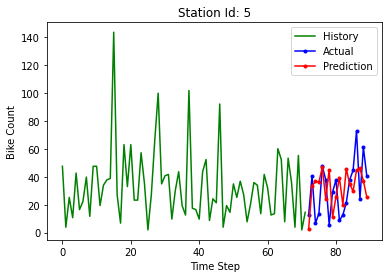

MAE: 17.931693559587135
MSE: 424.2502866367761
RMSE: 20.597336882149985
RMAE: 4.2345830443607
Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1972 - accuracy: 0.0000e+00
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1968 - accuracy: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1966 - accuracy: 0.0000e+00
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1965 - accuracy: 0.0000e+00
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1963 - accuracy: 0.0000e+00
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1961 - accuracy: 0.0000e+00
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1959 - accuracy: 0.0000e+00
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1958 - accuracy: 0.0000e+00
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1956 - accuracy: 0.0000e+00
Epoch 

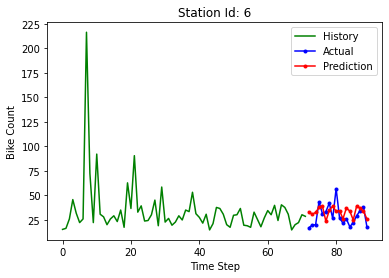

MAE: 9.637470896630642
MSE: 119.41676170065847
RMSE: 10.927797660126146
RMAE: 3.104427627861639
Epoch 1/5
15/15 [==============================] - 0s 1ms/step - loss: 1.0100 - accuracy: 0.0000e+00
Epoch 2/5
15/15 [==============================] - 0s 1ms/step - loss: 1.0098 - accuracy: 0.0000e+00
Epoch 3/5
15/15 [==============================] - 0s 1ms/step - loss: 1.0097 - accuracy: 0.0000e+00
Epoch 4/5
15/15 [==============================] - 0s 1ms/step - loss: 1.0098 - accuracy: 0.0000e+00
Epoch 5/5
15/15 [==============================] - 0s 1ms/step - loss: 1.0097 - accuracy: 0.0000e+00


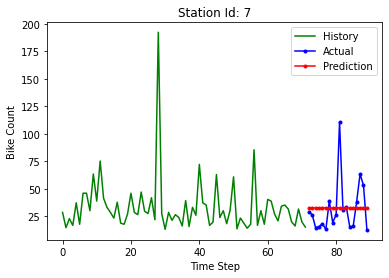

MAE: 16.409966409717622
MSE: 553.7836815597241
RMSE: 23.532608898286735
RMAE: 4.050921674103021
Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3820 - accuracy: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3801 - accuracy: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.0000e+00
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 0.0000e+00
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.0000e+00
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.0000e+00
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.0000e+00
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.0000

7/7 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.0000e+00
Epoch 81/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.0000e+00
Epoch 82/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3186 - accuracy: 0.0000e+00
Epoch 83/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.0000e+00
Epoch 84/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.0000e+00
Epoch 85/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.0000e+00
Epoch 86/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.0000e+00
Epoch 87/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.0000e+00
Epoch 88/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.0000e+00
Epoch 89/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.00

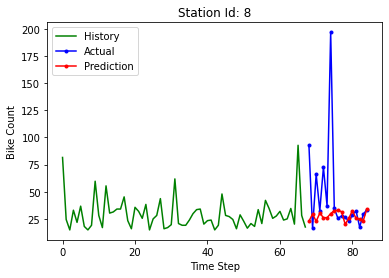

MAE: 23.513754574680746
MSE: 2193.6560593532226
RMSE: 46.83648214109619
RMAE: 4.849098325944809
Epoch 1/5
5/5 [==============================] - 0s 2ms/step - loss: 1.1043 - accuracy: 0.0000e+00
Epoch 2/5
5/5 [==============================] - 0s 2ms/step - loss: 1.1038 - accuracy: 0.0000e+00
Epoch 3/5
5/5 [==============================] - 0s 1ms/step - loss: 1.1037 - accuracy: 0.0000e+00
Epoch 4/5
5/5 [==============================] - 0s 2ms/step - loss: 1.1034 - accuracy: 0.0000e+00
Epoch 5/5
5/5 [==============================] - 0s 1ms/step - loss: 1.1032 - accuracy: 0.0000e+00


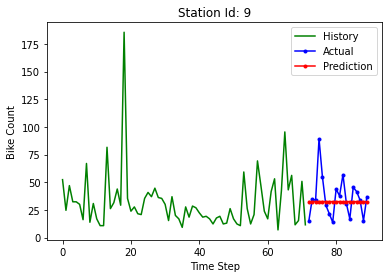

MAE: 13.135623091159808
MSE: 337.7504533195075
RMSE: 18.377988282712217
RMAE: 3.6243100158733395

Error Calculation
Average MAE: 15.091599235875071
Average MSE: 602.5375301098802
Average RMSE: 21.412477338014188
Average RMAE: 3.6472648132839347


In [23]:
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

np.random.seed(7)

#no_station = len(location['Station.Id'])
no_station = 10
for i in range(1, no_station):
    
    X = df[i].values[:, 6:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df[i].values[:, 0:1] # 'In'
 
    ### Sandardization of data ###
    from sklearn.preprocessing import StandardScaler

    PredictorScaler = StandardScaler()
    TargetVarScaler = StandardScaler()

    # Generating the standardized values of X and y
    X = PredictorScaler.fit(X).transform(X)
    y = TargetVarScaler.fit(y).transform(y)
 
    # Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    ### create ANN model ###

    neural_network_model = keras.Sequential([
    layers.Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'),
    layers.Dense(units=5, kernel_initializer='normal', activation='tanh'),
    layers.Dense(1, kernel_initializer='normal'),
    ])

    # Fitting the ANN to the Training set
    neural_network_model.compile(optimizer ='adam', loss ='mean_squared_error', metrics = ['accuracy'])
    
    # find best parameters
    result_df = FunctionFindBestParams(X_train, y_train, X_test, y_test)
    return_df = result_df.loc[result_df['Accuracy'] == result_df['Accuracy'].max()]
    best_batch_size = int(return_df['batch_size'][0])
    best_epochs = int(return_df['epochs'][0])
    
    neural_network_model.fit(X_train, y_train, batch_size = best_batch_size,  epochs = best_epochs)

    pred = neural_network_model.predict(X_test)
    y_pred = TargetVarScalerFit.inverse_transform(pred)
    y_test_org = TargetVarScalerFit.inverse_transform(y_test)
    y_train = TargetVarScalerFit.inverse_transform(y_train)
    Test_Data = PredictorScalerFit.inverse_transform(X_test)
 
    plot_graph(y_train, y_test_org, y_pred, i)
    print_error_calculation(y_test_org,y_pred)

    totalMAE += get_MAE(y_test_org,y_pred)
    totalMSE += get_MSE(y_test_org,y_pred)
    totalRMAE += get_RMSE(y_test_org,y_pred)
    totalRMSE += get_RMAE(y_test_org,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)
    

- https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/